In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('final_cleaned_dataset.csv')
df.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
df

,Host_Since,Accommodates,Bathrooms,Bedrooms,Beds,Bed_Type,Price,Security_Deposit,Cleaning_Fee,Guests_Included,Extra_People,Calendar_Updated,Availability_60,Review_Scores_Rating,Cancellation_Policy,Reviews_per_Month,Entire_home/apt,apartment,bed_breakfast,hoster,house,other,Amenities_:_Air_conditioning,Amenities_:_Self_Check-In,Amenities_:_Buzzer/wireless_intercom,Amenities_:_Outlet_covers,Amenities_:_Paid_parking_off_premises,Amenities_:_Room-darkening_shades,Amenities_:_TV,Amenities_:_Elevator_in_building,Amenities_:_Carbon_monoxide_detector,Amenities_:_Wireless_Internet,Amenities_:_Window_guards,Amenities_:_Washer_/_Dryer,Amenities_:_Iron,Amenities_:_Smartlock,Amenities_:_Doorman_Entry,Amenities_:_Breakfast,Amenities_:_Essentials,Amenities_:_Other_pet(s),Amenities_:_Wheelchair_accessible,Amenities_:_Private_living_room,Amenities_:_Baby_bath,Amenities_:_Laptop_friendly_workspace,Amenities_:_Lockbox,Amenities_:_Game_console,Amenities_:_Smoke_detector,Amenities_:_Gym,Amenities_:_Baby_monitor,Amenities_:_Keypad,Amenities_:_Fireplace_guards,Amenities_:_Free_parking_on_street,Amenities_:_Changing_table,Amenities_:_Free_parking_on_premises,Amenities_:_Pool,Amenities_:_Children’s_dinnerware,Amenities_:_Children’s_books_and_toys,Amenities_:_Crib,Amenities_:_Table_corner_guards,Amenities_:_Hair_dryer,Amenities_:_Fire_extinguisher,Amenities_:_Private_entrance,Amenities_:_Internet,Amenities_:_Smoking_allowed,Amenities_:_Hangers,Amenities_:_Dog(s),Amenities_:_Safety_card,Amenities_:_Stair_gates,Amenities_:_First_aid_kit,Amenities_:_High_chair,Amenities_:_Bathtub,Amenities_:_Washer,Amenities_:_Pets_allowed,Amenities_:_Cat(s),Amenities_:_Family/kid_friendly,Amenities_:_translation_missing:_en.hosting_amenity_49,Amenities_:_Pack_’n_Play/travel_crib,Amenities_:_Shampoo,Amenities_:_Hot_tub,Amenities_:_Dryer,Amenities_:_Indoor_fireplace,Amenities_:_24-hour_check-in,Amenities_:_Suitable_for_events,Amenities_:_Babysitter_recommendations,Amenities_:_Pets_live_on_this_property,Amenities_:_translation_missing:_en.hosting_amenity_50,Amenities_:_Heating,Amenities_:_Doorman,Amenities_:_Cable_TV,Amenities_:_Lock_on_bedroom_door,Amenities_:_Kitchen,Host_Verifications_:_weibo,Host_Verifications_:_phone,Host_Verifications_:_sesame,Host_Verifications_:_manual_online,Host_Verifications_:_kba,Host_Verifications_:_reviews,Host_Verifications_:_amex,Host_Verifications_:_linkedin,Host_Verifications_:_email,Host_Verifications_:_selfie,Host_Verifications_:_None,Host_Verifications_:_facebook,Host_Verifications_:_offline_government_id,Host_Verifications_:_government_id,Host_Verifications_:_google,Host_Verifications_:_photographer,Host_Verifications_:_manual_offline,Host_Verifications_:_work_email,Host_Verifications_:_sent_id,Features_:_Instant_Bookable,Features_:_Require_Guest_Phone_Verification,Features_:_Host_Identity_Verified,Features_:_Require_Guest_Profile_Picture,Features_:_Is_Location_Exact,Features_:_Host_Has_Profile_Pic,Features_:_Host_Is_Superhost,Neighbourhood_Cleansed_:_Palais-Bourbon,Neighbourhood_Cleansed_:_Reuilly,Neighbourhood_Cleansed_:_Buttes-Chaumont,Neighbourhood_Cleansed_:_Louvre,Neighbourhood_Cleansed_:_Gobelins,Neighbourhood_Cleansed_:_Bourse,Neighbourhood_Cleansed_:_Panthéon,Neighbourhood_Cleansed_:_Batignolles-Monceau,Neighbourhood_Cleansed_:_Luxembourg,Neighbourhood_Cleansed_:_Entrepôt,Neighbourhood_Cleansed_:_Opéra,Neighbourhood_Cleansed_:_Ménilmontant,Neighbourhood_Cleansed_:_Élysée,Neighbourhood_Cleansed_:_Temple,Neighbourhood_Cleansed_:_Observatoire,Neighbourhood_Cleansed_:_Popincourt,Neighbourhood_Cleansed_:_Vaugirard,Neighbourhood_Cleansed_:_Passy,Neighbourhood_Cleansed_:_Buttes-Montmartre,Neighbourhood_Cleansed_:_Hôtel-de-Ville,30_nearest_POI_average
0,1884.0,2,1.0,1.0,1.0,1,50.0,500.0,30.0,1,0,4,15,80.0,0,0.16,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [3]:
df.shape

(40028, 138)

In [4]:
df.columns

Index(['Host_Since', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Bed_Type', 'Price', 'Security_Deposit', 'Cleaning_Fee',
       'Guests_Included',
       ...
       'Neighbourhood_Cleansed_:_Ménilmontant',
       'Neighbourhood_Cleansed_:_Élysée', 'Neighbourhood_Cleansed_:_Temple',
       'Neighbourhood_Cleansed_:_Observatoire',
       'Neighbourhood_Cleansed_:_Popincourt',
       'Neighbourhood_Cleansed_:_Vaugirard', 'Neighbourhood_Cleansed_:_Passy',
       'Neighbourhood_Cleansed_:_Buttes-Montmartre',
       'Neighbourhood_Cleansed_:_Hôtel-de-Ville', '30_nearest_POI_average'],
      dtype='object', length=138)

In [5]:
# Separating X and y
X = df.drop('Price', axis=1)  
y = df.Price
y = y.values.reshape(y.shape[0], 1)

In [6]:
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))
from sklearn import preprocessing
y = preprocessing.scale(y)

In [7]:
# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [8]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[10:07:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.3 minutes

Training MSE: 0.2695
Validation MSE: 0.2811

Training r2: 0.7303
Validation r2: 0.7199


In [10]:
#k-fold Cross Validation using XGBoost
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10, metrics='rmse',as_pandas=True, seed=123)


[10:08:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:08:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.052175,0.002671,1.053102,0.004997
1,0.999183,0.009189,1.001507,0.009424
2,0.953511,0.009085,0.956619,0.009329
3,0.912108,0.009822,0.916350,0.004040
4,0.886401,0.015257,0.890955,0.008295


In [12]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.55203
Name: test-rmse-mean, dtype: float64


In [13]:
#Visualize Boosting Trees and Feature Importance
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[10:09:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
#### Plotting the first tree
xgb.plot_tree(xg_reg,num_trees=0) 
#plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

In [33]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg
with pd.option_context('display.max_rows', None,'display.max_columns', 10): print(ft_weights_xgb_reg)



                                                      weight
Amenities_:_High_chair                              0.000000
Amenities_:_Dog(s)                                  0.000000
Amenities_:_Hangers                                 0.000000
Host_Verifications_:_None                           0.000000
Amenities_:_Private_entrance                        0.000000
Amenities_:_Fire_extinguisher                       0.000000
Amenities_:_Hair_dryer                              0.000000
Amenities_:_Table_corner_guards                     0.000000
Amenities_:_Crib                                    0.000000
Amenities_:_Stair_gates                             0.000000
Amenities_:_Children’s_books_and_toys               0.000000
Amenities_:_Pool                                    0.000000
Amenities_:_Free_parking_on_premises                0.000000
Amenities_:_Changing_table                          0.000000
Amenities_:_Free_parking_on_street                  0.000000
Amenities_:_Fireplace_gu

UsageError: Line magic function `%%capture` not found.


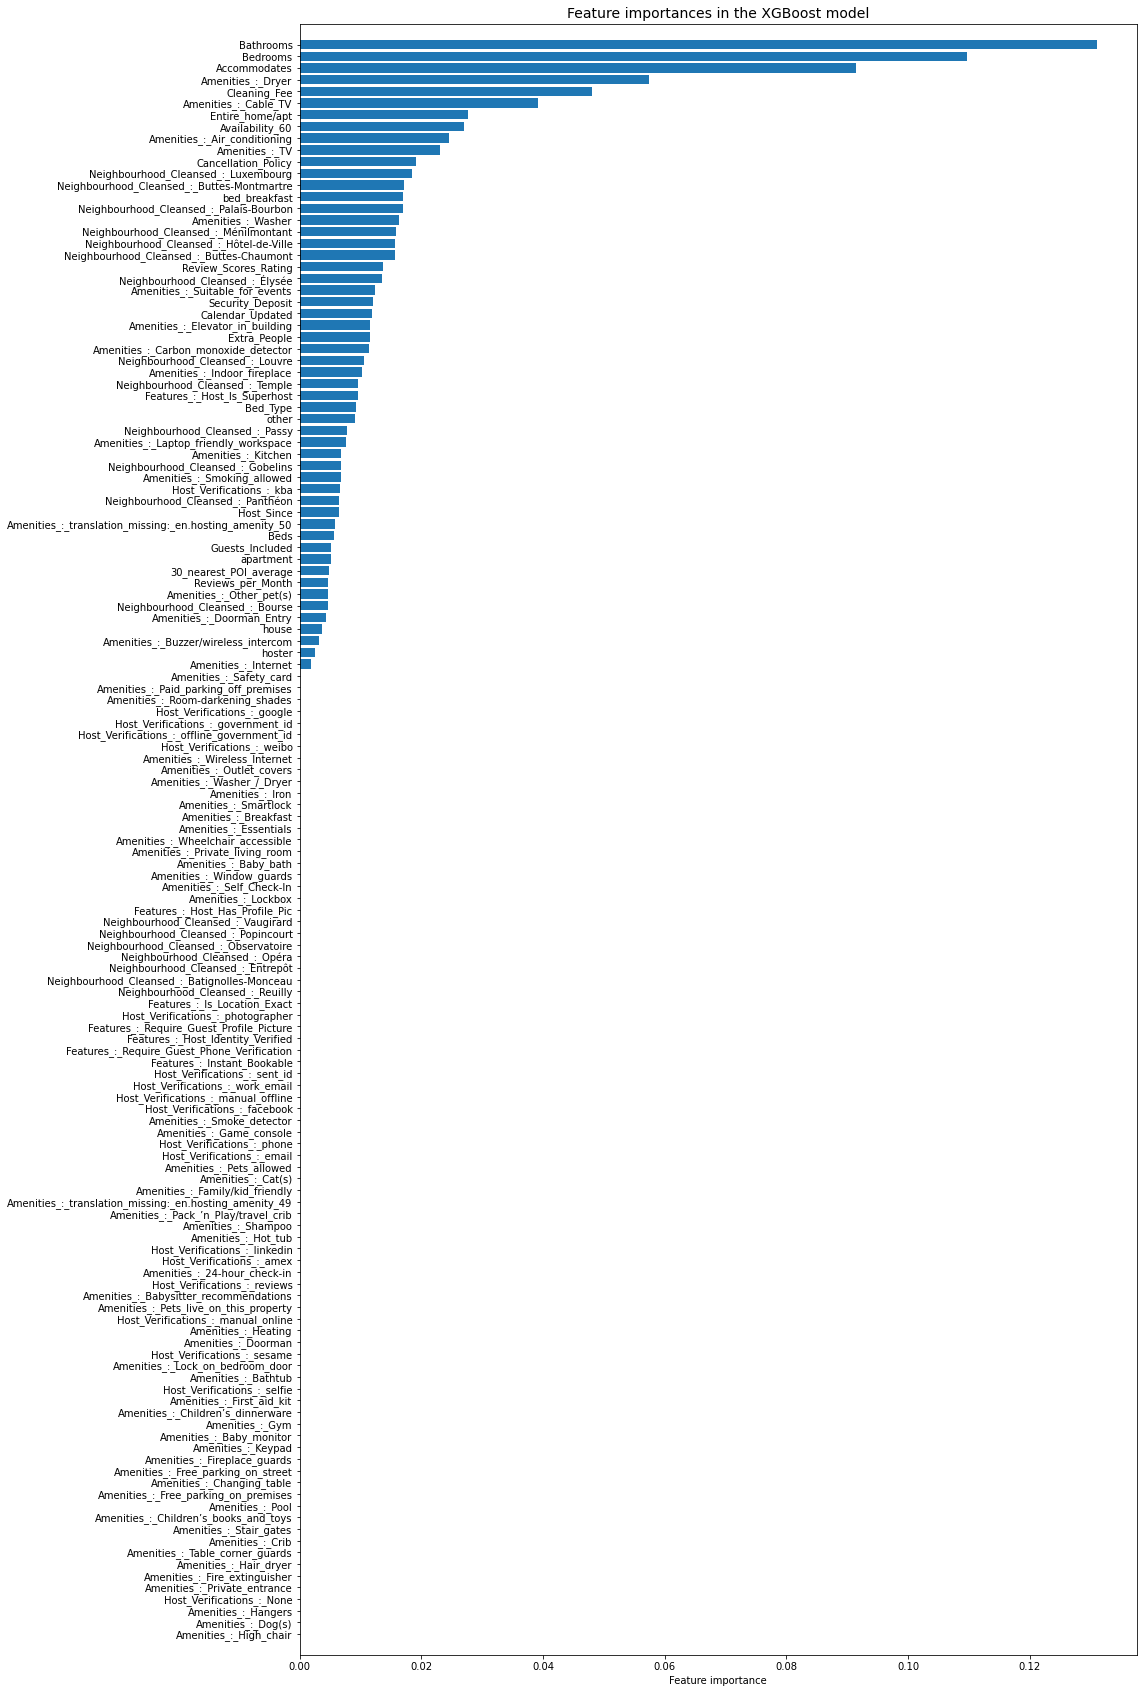

In [20]:
# Plotting feature importances
plt.figure(figsize=(15,30))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
#plt.show()
plt.savefig('Features-importance.png', bbox_inches='tight')